# Mastodon analysis
Expected to be run in a notebook

[DuckDB in Jupyter Notebooks](https://duckdb.org/docs/guides/python/jupyter)

In [3]:
%config SqlMagic.autopandas = True
%config SqlMagic.feedback = False
%config SqlMagic.displaycon = False

In [19]:
import duckdb
import pandas as pd
import seaborn as sns

# Import jupysql Jupyter extension to create SQL cells
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [9]:
%sql duckdb:///:memory:
# %sql duckdb:///path/to/file.db

In [10]:
%%sql
INSTALL httpfs;
LOAD httpfs;

""


In [12]:
%%sql
create table mastodon_raw as select *  FROM read_parquet('../xx.parquet');

,Count
0,501000


# The Mastodon app landscape
What clients are used to access mastodon instances

In [26]:
%%sql
mastodon_app_df << 
select *
from mastodon_raw
where app is not null and app <>''
;

Returning data to local variable mastodon_app_df


<AxesSubplot: xlabel='count', ylabel='app'>

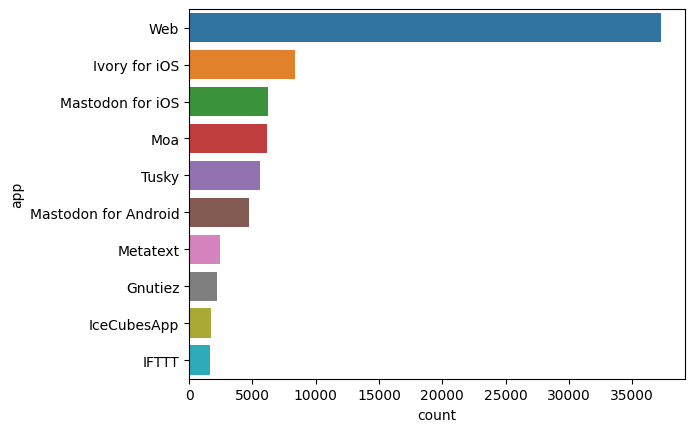

In [27]:
sns.countplot(data=mastodon_app_df, y="app", order=mastodon_app_df.app.value_counts().iloc[:10].index)

In [97]:
%%sql
mastodon_usage_df << 
select date_part('day', created_tz) as created_day
, date_part('hour', created_tz) as created_hour
, count(*) as num
from mastodon_raw
group by 1,2 
order by 1,2
;

Returning data to local variable mastodon_usage_df


<AxesSubplot: xlabel='created_hour', ylabel='num'>

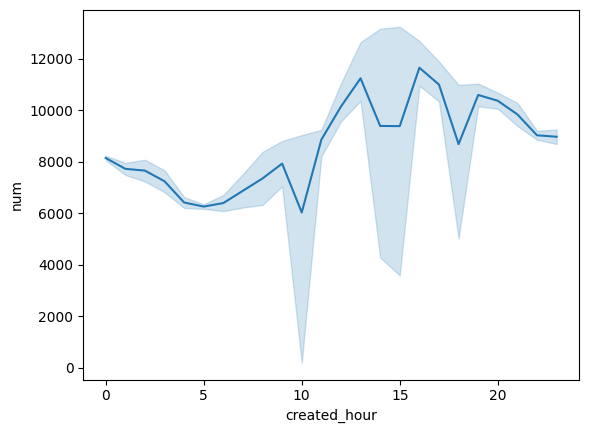

In [99]:
sns.lineplot(data=mastodon_usage_df, x="created_hour", y="num")
# sns.lineplot(data=mastodon_usage_df, x="created_hour", y="num", hue="created_day")

# Language usage
A wildly inaccurate investigation of language tags

In [102]:
%%sql
mastodon_usage_df << 
select *
from mastodon_raw
;

Returning data to local variable mastodon_usage_df


<AxesSubplot: xlabel='count', ylabel='language'>

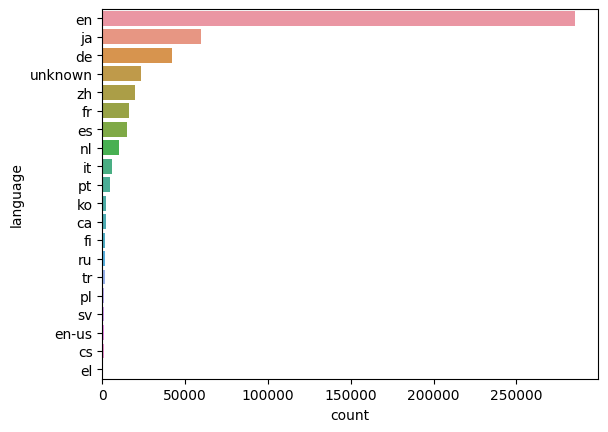

In [103]:
sns.countplot(data=mastodon_usage_df, y="language", order=mastodon_usage_df.language.value_counts().iloc[:20].index)

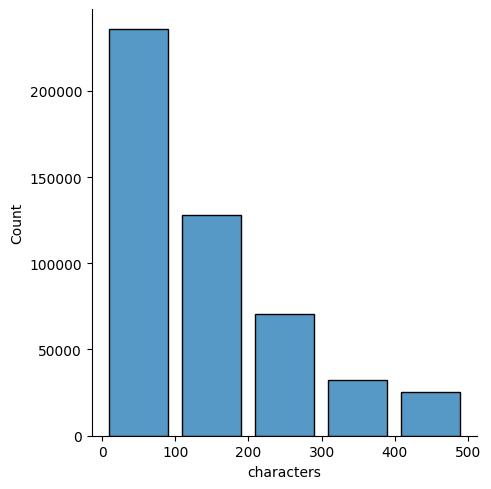

In [104]:
sns.displot(data=mastodon_usage_df[mastodon_usage_df['characters']<500], x="characters", bins=5, shrink=.8)

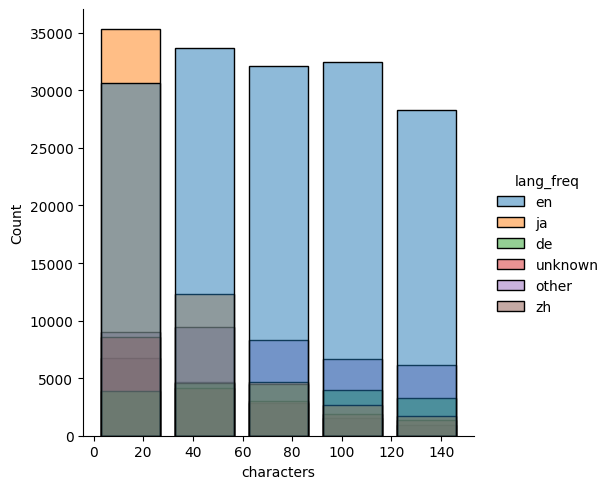

In [105]:
freq_language_list = mastodon_usage_df.language.value_counts().iloc[:5].index
mastodon_usage_df['lang_freq'] = mastodon_usage_df['language'].apply(lambda x: x if x in freq_language_list else 'other')
sns.displot(data=mastodon_usage_df[mastodon_usage_df['characters']<150], x="characters", bins=5, shrink=.8, hue="lang_freq")
